# 1 Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# 2 EDA

### 2.1. Importing data and Understanding the Data Structure

In [2]:
White_wine_data = pd.read_csv("wine-quality White.csv")

In [3]:
White_wine_data.shape

(4898, 12)

In [4]:
White_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


df.head() gives us the first five records from this data

In [5]:
White_wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


df.tail() gives us last five rows of data

In [6]:
White_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


df.describe gives description about data

count = number of records

Std = Standard Deviation of data

Min = Minimum values of the attributes

25% , 50% , 75% = percentile values of the data

Max = Maximum values of the attributes of the data data

In [7]:
White_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
White_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### 2.2 Handling Missing Values

In [9]:
White_wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values 

### 2.3 Exploring Data Distribution


**Histograms and Density Plots** : These plots are generated to observe the distribution of each numeric variable, giving a sense of skewness and spread. KDE (Kernel Density Estimate) plots are overlaid on histograms for a smoother view.

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_22976\2895468034.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(White_wine_data[column], shade=True)
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_22976\2895468034.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(White_wine_data[column], shade=True)
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_22976\2895468034.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(White_wine_data[column], shade=True)
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_22976\2895468034.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will becom

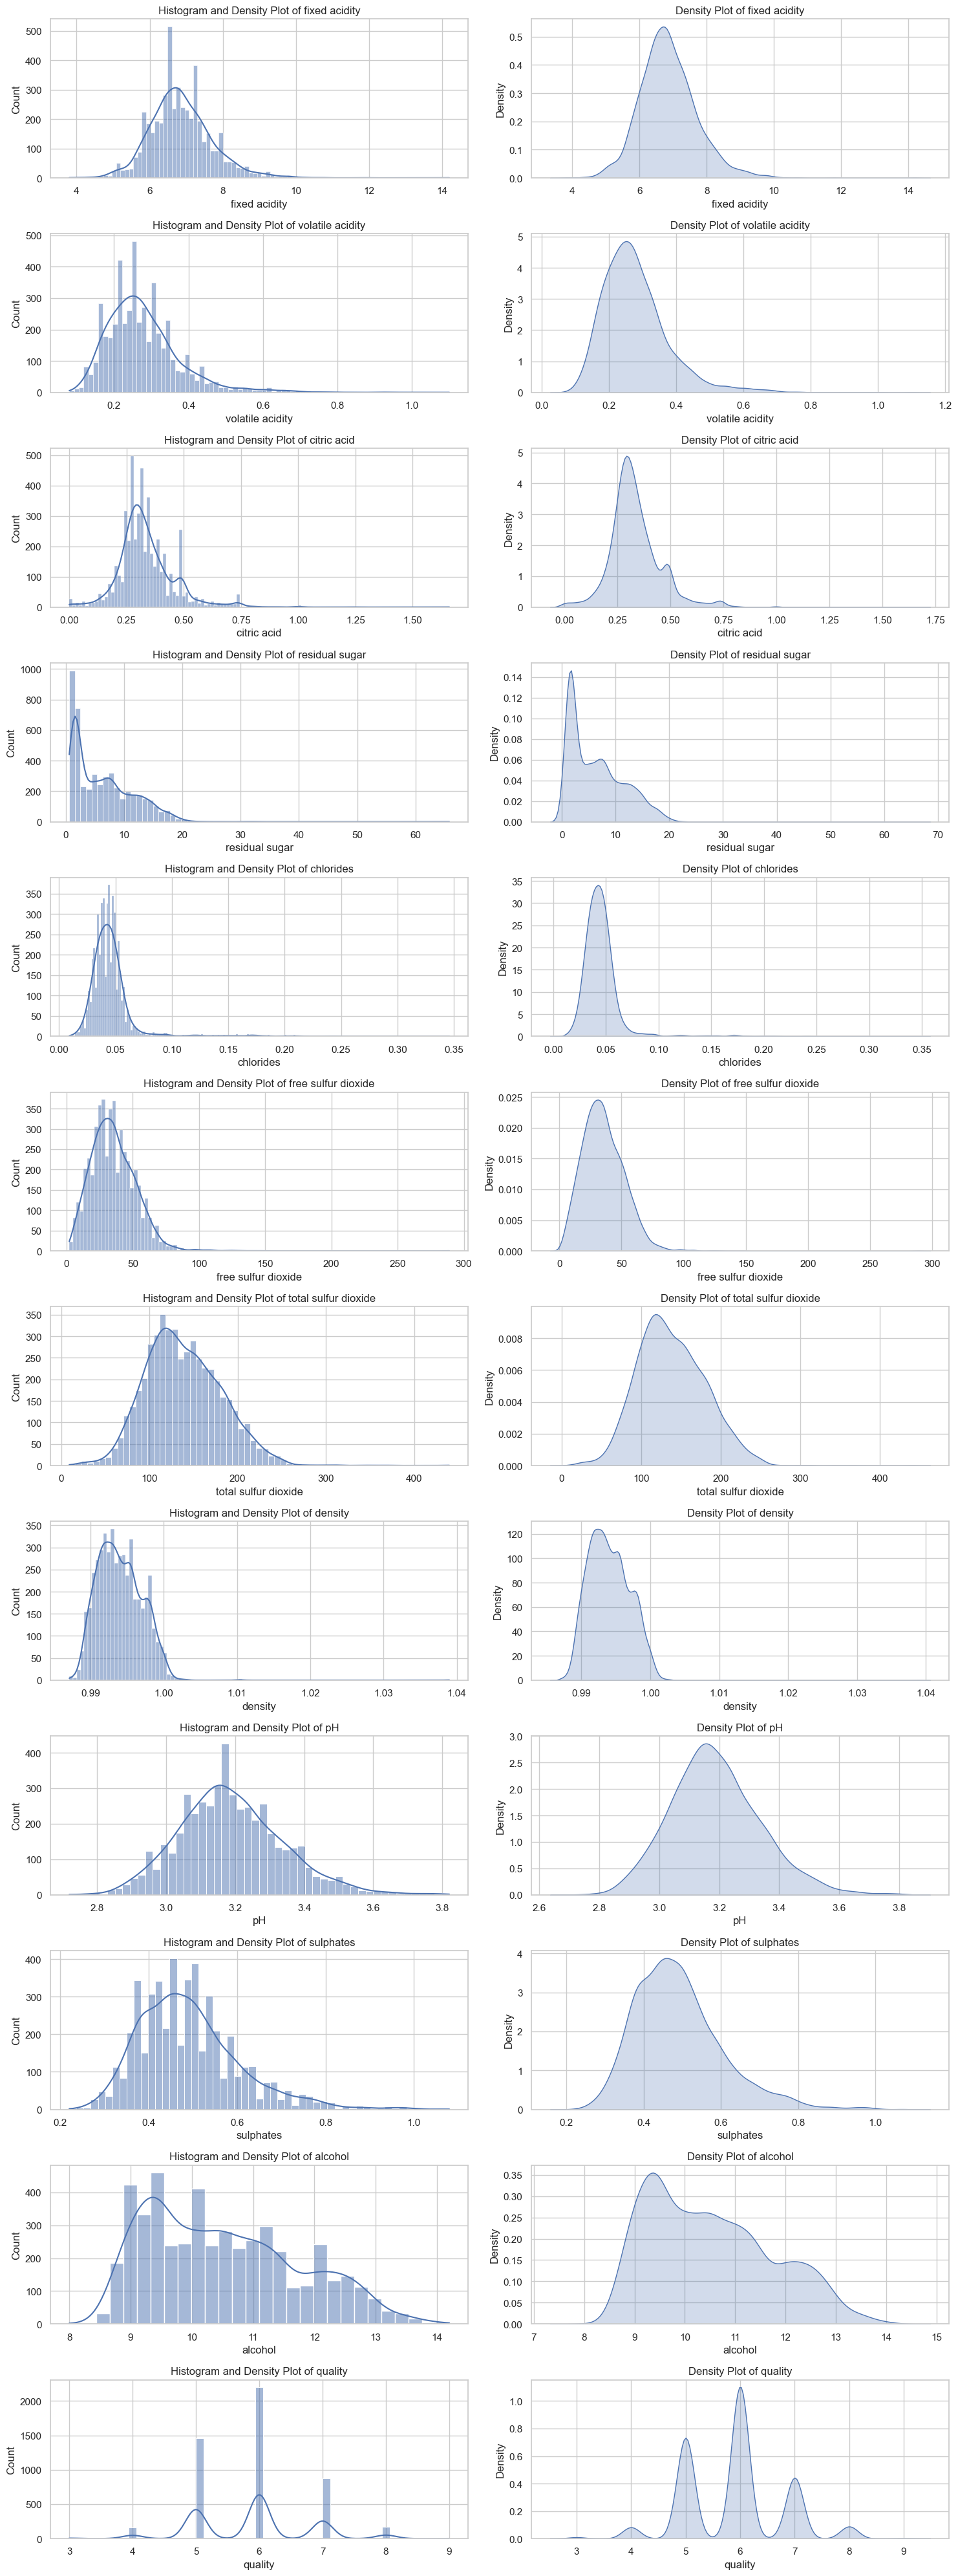

In [10]:
sns.set(style="whitegrid")

# Step 1: Histograms and Density Plots
numeric_columns = White_wine_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 40))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, i * 2 - 1)
    sns.histplot(White_wine_data[column], kde=True)
    plt.title(f'Histogram and Density Plot of {column}')
    
    plt.subplot(len(numeric_columns), 2, i * 2)
    sns.kdeplot(White_wine_data[column], shade=True)
    plt.title(f'Density Plot of {column}')

plt.tight_layout()
plt.show()

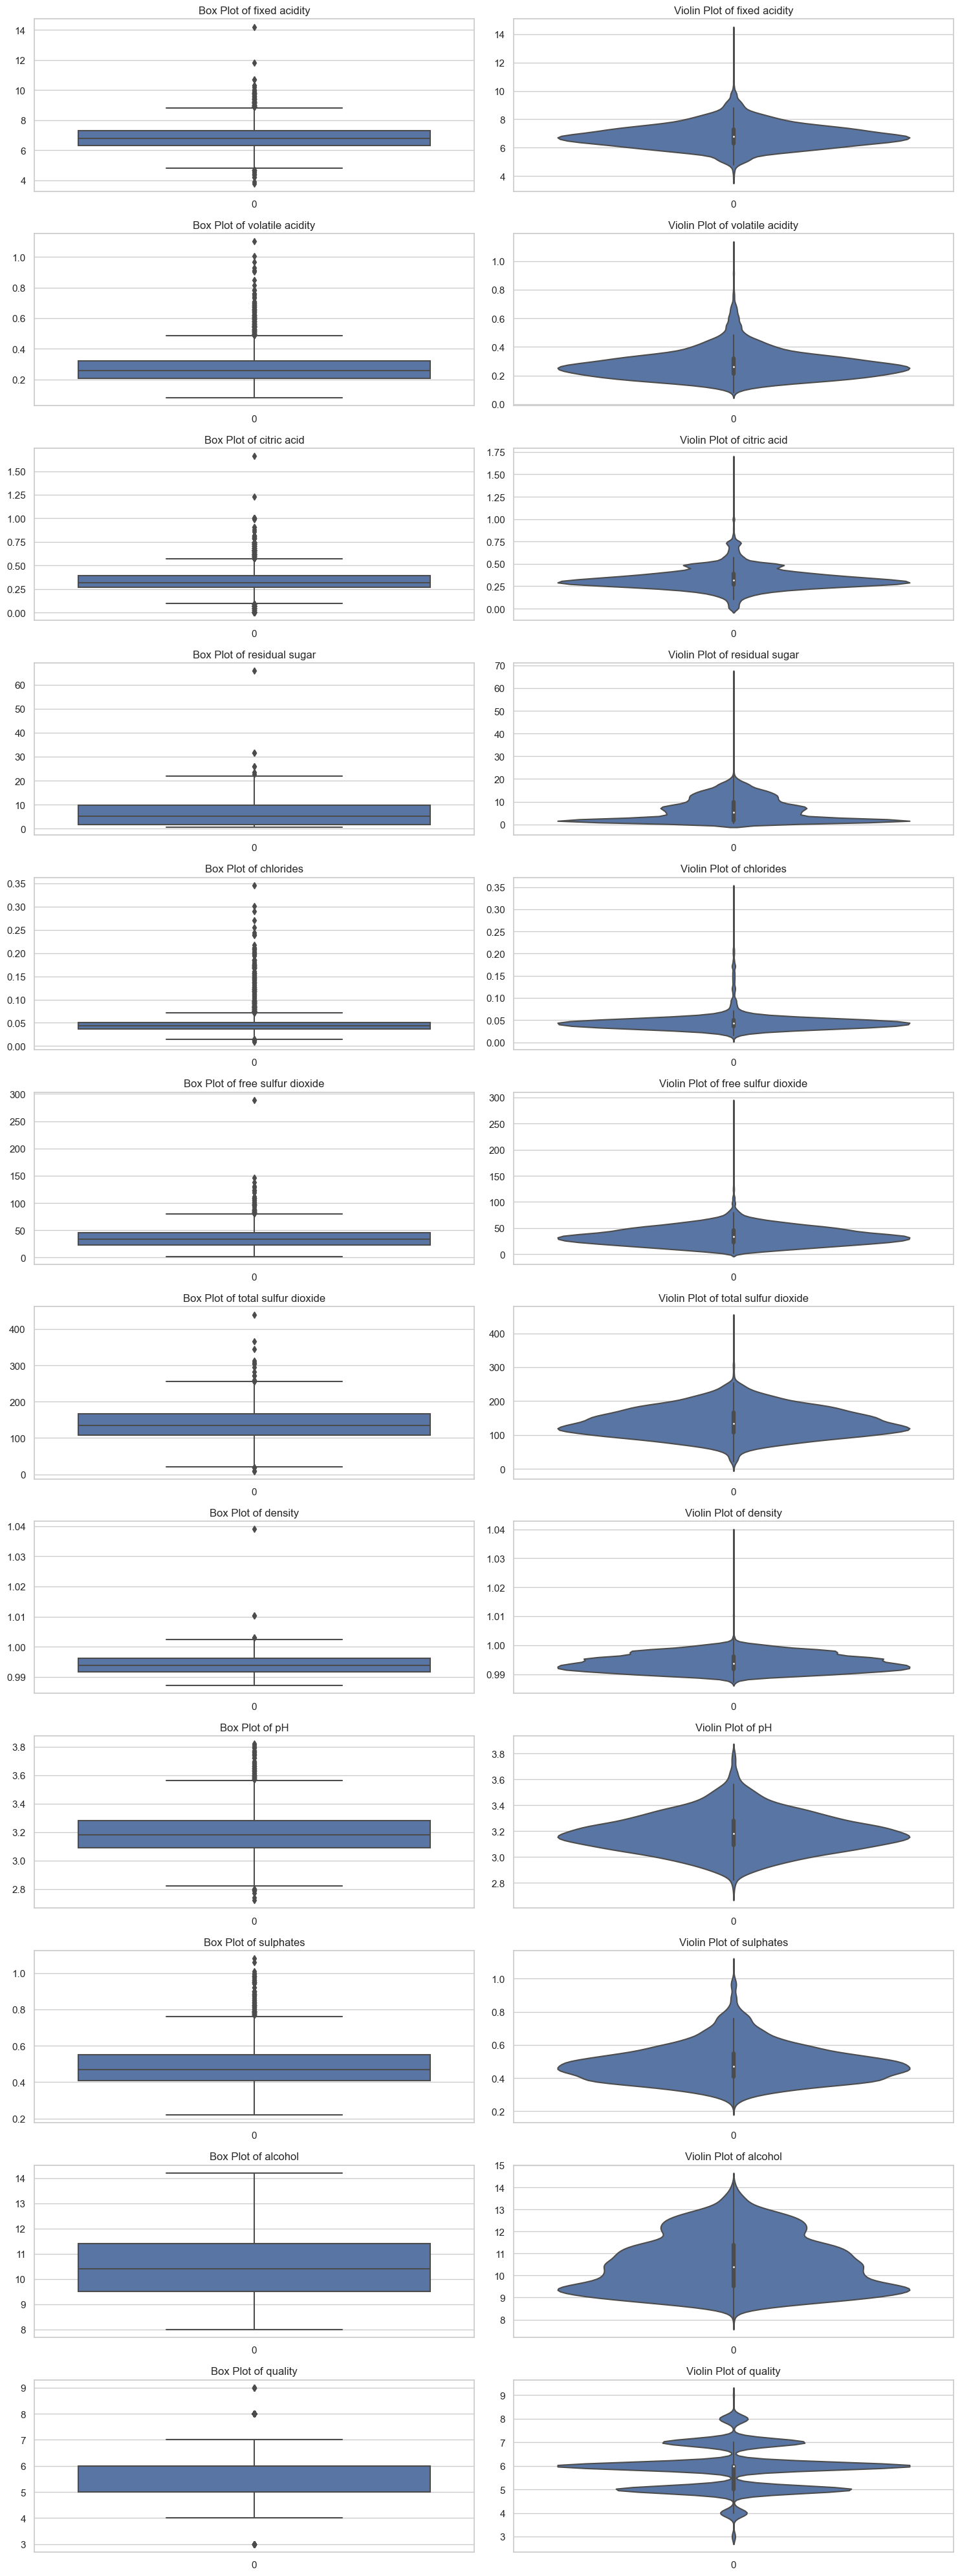

In [11]:
plt.figure(figsize=(15, 40))
#for i, column in enumerate(numeric_columns, 1,2):
j=1

for i in range (len(numeric_columns)):
    
    plt.subplot(len(numeric_columns) , 2, j)
    sns.boxplot(White_wine_data[numeric_columns[i]])
    plt.title(f'Box Plot of {numeric_columns[i]}')
    
    j=j+1
    
    plt.subplot(len(numeric_columns)  , 2,j)
    sns.violinplot(White_wine_data[numeric_columns[i]])
    plt.title(f'Violin Plot of {numeric_columns[i]}')
    
    j=j+1

plt.tight_layout()
plt.show()



**Fixed Acidity:**

Distribution is slightly right-skewed, with most values clustered around 6–7.
Box plot indicates some outliers on both ends, but especially on the higher end.

**Volatile Acidity:**

Distribution shows a peak around 0.2–0.3, with a right-skew.
Numerous high outliers suggest some wines have unusually high volatile acidity, which can affect taste.

**Citric Acid:**

The majority of values are concentrated below 0.5, with a significant drop-off beyond that.
Box plot reveals outliers beyond 1.0, although these are rare.

**Residual Sugar:**

Most values are concentrated at the lower end (below 10), indicating generally low sugar content.
Outliers extend up to over 60, representing a few very sweet wines.

**Chlorides:**

Chlorides distribution is highly skewed to the right, with most values under 0.1.
There are a considerable number of high outliers, indicating variations in salt levels.

**Free Sulfur Dioxide:**

Right-skewed distribution with most values under 50, but some outliers exceed 100.
High free sulfur dioxide levels are less common, but they exist.

**Total Sulfur Dioxide:**

Concentrated between 100 and 200, with a fairly symmetric distribution.
Outliers are present on both ends, indicating variations in preservation levels.

**Density:**

Distribution centers around 1.0, typical for most wines.
Only a few minor outliers suggest slight deviations in density.

**pH:**

The majority of wines have a pH between 3.0 and 3.3, with a mild right-skew.
Some outliers exist on both ends, indicating a small range in acidity levels.

**Sulphates:**

Right-skewed with most values between 0.4 and 0.6.
High outliers indicate certain wines have increased sulphate levels, possibly for preservation.

**Alcohol:**

Concentrated between 9% and 11% ABV (alcohol by volume), with a right-skew.
A few wines have higher alcohol content, though not excessively.

**Quality:**

Quality ratings are primarily clustered around 5 to 6, suggesting average quality for most samples.
Few wines have extreme ratings (either high or low), shown as isolated points in the box plot.

### 2.4 Identifying Outliers

In [12]:
# Step 2: Z-score Method
# Outliers are identified using Z-scores; threshold typically set at |z| > 3
z_scores = np.abs(stats.zscore(White_wine_data[numeric_columns]))
outliers_zscore = (z_scores > 3).any(axis=1)
data_outliers_zscore = White_wine_data[outliers_zscore]

print("Outliers identified using Z-score method:")
print(data_outliers_zscore)

Outliers identified using Z-score method:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
17              6.2              0.66         0.48             1.2      0.029   
20              6.2              0.66         0.48             1.2      0.029   
23              7.6              0.67         0.14             1.5      0.074   
40              6.7              0.23         0.39             2.5      0.172   
41              6.7              0.24         0.39             2.9      0.173   
...             ...               ...          ...             ...        ...   
4820            5.8              0.36         0.50             1.0      0.127   
4841            5.7              0.22         0.25             1.1      0.050   
4845            6.6              0.38         0.29             2.4      0.136   
4867            5.3              0.60         0.34             1.4      0.031   
4886            6.2              0.21         0.28             5.7 

### Z-score
Using the Z-score method with a threshold of ∣z∣>3, we identified `411` rows as outliers in the dataset. Here's an analysis of these outliers:

**Outlier Prevalence:**

A substantial portion of the dataset contains outliers, suggesting significant variability in some attributes.
Outliers are present across different features, indicating diverse chemical compositions and characteristics in the wines.

**Attributes with Frequent Outliers:**

**Alcohol and Chlorides:** Many outliers are observed in these columns, indicating that some wines have either unusually high or low levels, which could influence taste and preservation.

**Total Sulfur Dioxide and Free Sulfur Dioxide:** There are numerous outliers in sulfur dioxide levels, which may reflect variations in preservation practices.

**Fixed and Volatile Acidity:** Outliers in acidity could impact wine taste profiles, with some wines having extreme values.

**Quality Ratings:**

Outliers span various quality ratings, but notably, higher alcohol levels are more frequent in wines rated 7–8, which might indicate a correlation between alcohol content and perceived quality.

**Potential Influence on Wine Profiles:**

Outliers in sulfur dioxide, alcohol, and acidity likely affect taste, aroma, and preservation.
Wines with high residual sugar, for example, could be considerably sweeter and more suitable as dessert wines.

### Reasons to Keep Outliers

**Reflecting Real-World Variability:**
In the wine industry, there is natural variability in chemical compositions (e.g., acidity, sulfur dioxide levels, alcohol content) due to different production methods, grape types, and regional practices. Outliers may represent this authentic diversity and could be valuable if you want to understand the complete range of wines.

**Potential Insights:**
Outliers might highlight unique wines that cater to specific consumer preferences, such as wines with high residual sugar for sweetness or high alcohol content. Retaining them allows you to analyze wines with atypical profiles and understand factors that may influence quality ratings in unusual cases.

**Risk of Bias:**
Removing outliers could result in a biased understanding, as wines with certain characteristics might be overrepresented or underrepresented. For instance, high-quality, high-alcohol wines could be disproportionately removed if high alcohol levels are considered outliers, leading to skewed insights into quality factors.

**Small Dataset Impact:**
If the dataset is relatively small, removing a large number of outliers (411 rows in this case) could significantly reduce the sample size, which may affect the robustness and reliability of the analysis.

### 2.5. Exploring Relationships between Variables

In [13]:
correlation_matrix = White_wine_data.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


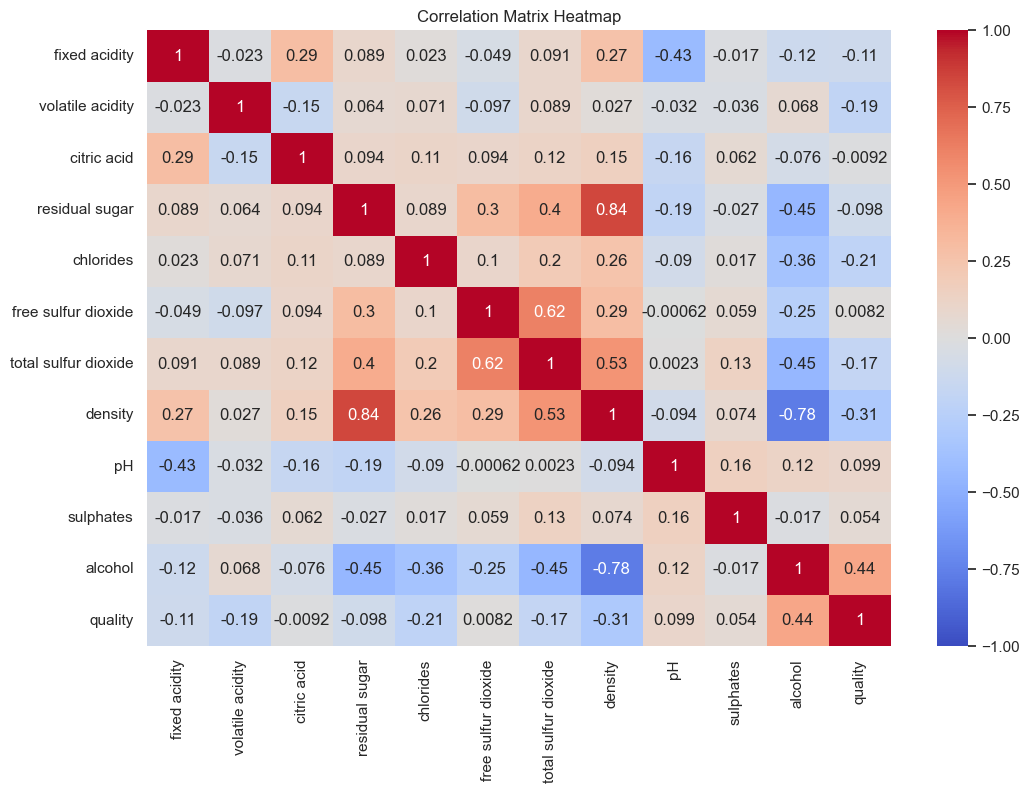

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

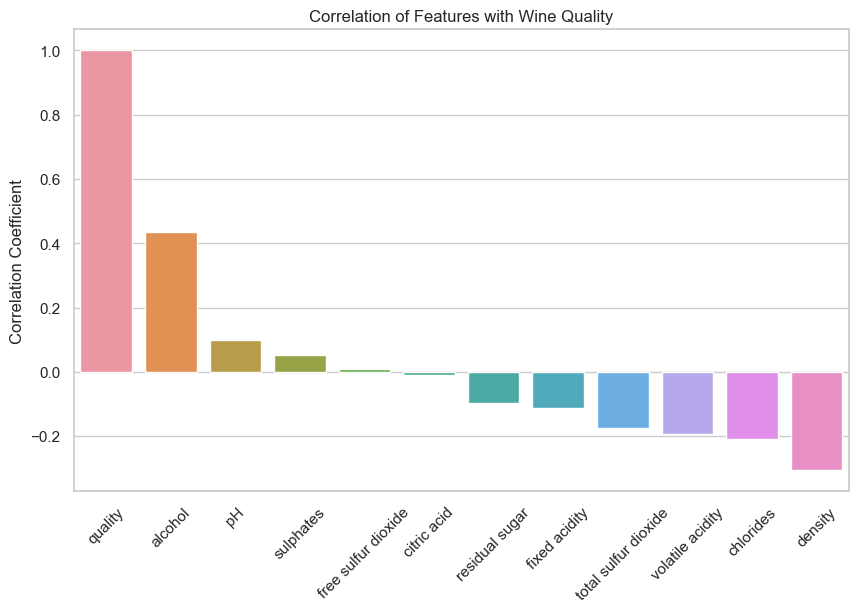

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

In [15]:
# Focusing on correlations with the 'quality' column
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)

# Plotting the correlations with quality
plt.figure(figsize=(10, 6))
sns.barplot(x=quality_correlations.index, y=quality_correlations.values)
plt.xticks(rotation=45)
plt.title('Correlation of Features with Wine Quality')
plt.ylabel('Correlation Coefficient')
plt.show()

# Display the correlation values for further inspection
quality_correlations

The correlation matrix shows the relationships between the different variables in the wine quality dataset, with values ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation). Here are some key insights:

**Quality:**

Alcohol has a moderately positive correlation with quality (0.436), indicating that wines with higher alcohol content tend to have higher quality ratings.
Density and Chlorides have negative correlations with quality (-0.307 and -0.210, respectively), suggesting that denser wines with higher chloride levels may be rated lower in quality.
Volatile Acidity also shows a negative correlation with quality (-0.195), as higher volatile acidity can make wines taste harsher, possibly reducing quality ratings.

**Alcohol:**

Strong negative correlation with Density (-0.780), indicating that wines with higher alcohol content tend to have lower density. This is expected, as alcohol is less dense than water.
Moderate negative correlation with Residual Sugar (-0.451) and Total Sulfur Dioxide (-0.449), which may reflect production practices or wine styles (e.g., drier wines with higher alcohol).

**Density:**

Strong positive correlation with Residual Sugar (0.839) and Total Sulfur Dioxide (0.530). This is consistent with denser wines having more sugar and possibly more preservatives.

**Total Sulfur Dioxide and Free Sulfur Dioxide:**

Strong positive correlation between Free and Total Sulfur Dioxide (0.616), which is expected, as free sulfur dioxide is part of the total sulfur dioxide in wines.
Moderate positive correlation between Total Sulfur Dioxide and Density (0.530), suggesting that sulfur dioxide levels tend to be higher in denser wines.

**pH:**

Negative correlation with Fixed Acidity (-0.426), as higher acidity generally lowers pH in wines.
Positive but low correlations with Sulphates (0.156) and Citric Acid (-0.164), suggesting some relationship with acidity and preservative levels, though it’s relatively weak.

# 2 Influential Features

In [16]:
# Assume 'quality' is the target and separate it
X = White_wine_data.drop(columns='quality')
y = White_wine_data['quality']

In [17]:
# Method 2: Mutual Information
# Calculate mutual information between features and target
mutual_info = mutual_info_classif(White_wine_data.drop(columns='quality'), White_wine_data['quality'])
mutual_info_series = pd.Series(mutual_info, index=X.columns)
mutual_info_series = mutual_info_series.sort_values(ascending=False)

print("Mutual Information Scores:")
print(mutual_info_series)


Mutual Information Scores:
density                 0.184066
alcohol                 0.174216
residual sugar          0.087226
total sulfur dioxide    0.085088
chlorides               0.076213
free sulfur dioxide     0.065293
citric acid             0.050141
volatile acidity        0.048948
pH                      0.029768
fixed acidity           0.019733
sulphates               0.014363
dtype: float64


**Mutual Information** : Measures dependency between each feature and the target. A higher score indicates a stronger association. This method is non-parametric and can capture non-linear relationships.



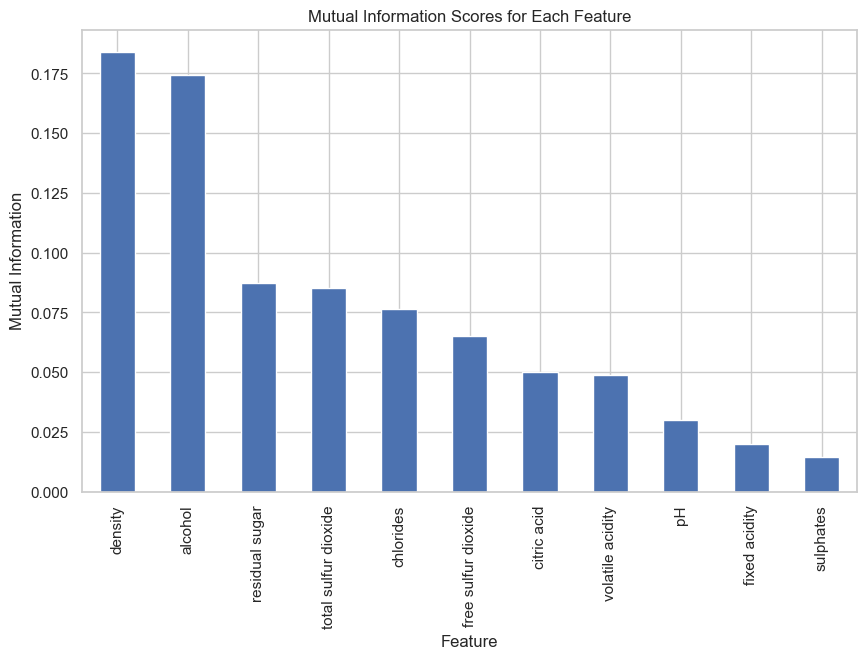

In [18]:
# Plot Mutual Information Scores
plt.figure(figsize=(10, 6))
mutual_info_series.plot(kind='bar')
plt.title("Mutual Information Scores for Each Feature")
plt.ylabel("Mutual Information")
plt.xlabel("Feature")
plt.show()


The Mutual Information plot illustrates the importance of different features with respect to predicting the target variable, likely the "quality" of the wine in this context. Mutual Information (MI) measures the dependency between variables, with higher values indicating a stronger relationship with the target. Here’s an analysis based on the plot:

**Top Influential Features:**

**Density** and **Alcohol** show the highest Mutual Information scores, suggesting they have the strongest relationship with wine quality. This makes sense, as both alcohol content and density often influence the perceived body and quality of wine.
**Dioxide (likely sulfur dioxide)** also has a notable MI score. Sulfur dioxide levels, particularly total and free forms, are important in preserving wine, influencing taste and aroma, and potentially impacting wine quality.

**Moderately Important Features:**

**Residual Sugar** and **Chlorides** also show moderate MI scores, indicating a fair impact on wine quality. Residual sugar can affect sweetness, which can be desirable or undesirable depending on the wine style, while chlorides (salt content) might influence taste balance.
**Citric Acid** and **Fixed Acidity** contribute to the wine’s acidity and freshness, which can affect the overall tasting profile and quality but are less impactful than alcohol or density in this dataset.

**Lower Influential Features:**

**pH** and **Sulphates** have lower MI scores, suggesting a relatively weaker direct relationship with wine quality in this dataset. While pH affects acidity, it appears to be less predictive of quality compared to density or alcohol.
**Volatile Acidity** and **Fixed Acidity** have the lowest scores, which may indicate that, in this dataset, they don’t play as significant a role in determining wine quality directly.

### The mutual information scores for the features in relation to the target variable (quality) are as follows:

Density (0.172) and Alcohol (0.160) have the highest mutual information scores, indicating they share the most information with the quality rating. These features likely play significant roles in determining wine quality.

Residual Sugar (0.095) and Total Sulfur Dioxide (0.090) also have moderate mutual information scores, suggesting that sugar and sulfur levels contribute moderately to quality.

Citric Acid (0.063) and Chlorides (0.055) have lower scores, meaning they contribute some information about quality but are less influential than density or alcohol content.

Features like Fixed Acidity (0.022) and Sulphates (0.020) have the lowest scores, implying a minimal direct impact on quality ratings in this dataset.

Interpretation
Higher Scores: Features with higher mutual information scores, such as density and alcohol, might be prioritized in predictive models or analyses aimed at understanding quality determinants.
Lower Scores: Features with low scores provide little additional information about quality, so they might be deprioritized in some contexts, such as model building or feature selection.

# 3 Dimensionality Reduction: 

In [19]:
# Assume 'quality' is the target and separate it
X = White_wine_data.drop(columns='quality')
y = White_wine_data['quality']

In [20]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
White_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [22]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03,4.898000e+03
mean,-3.481630e-16,4.497106e-16,1.160543e-17,-1.066249e-16,3.133467e-16,-1.015476e-17,-4.642174e-17,3.247201e-14,-1.183754e-15,-8.218098e-16,-3.713739e-16
std,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00,1.000102e+00
min,-3.620351e+00,-1.966985e+00,-2.761743e+00,-1.141944e+00,-1.683274e+00,-1.958677e+00,-3.044230e+00,-2.313038e+00,-3.101408e+00,-2.364709e+00,-2.043297e+00
25%,-6.575011e-01,-6.771010e-01,-5.304757e-01,-9.250474e-01,-4.473347e-01,-7.237750e-01,-7.144739e-01,-7.707066e-01,-6.508363e-01,-6.997104e-01,-8.242757e-01
50%,-6.493106e-02,-1.809917e-01,-1.172780e-01,-2.349217e-01,-1.269060e-01,-7.692173e-02,-1.026189e-01,-9.609320e-02,-5.475133e-02,-1.739212e-01,-9.286267e-02
75%,5.276390e-01,4.143393e-01,4.611988e-01,6.918185e-01,1.935226e-01,6.287364e-01,6.739664e-01,6.930457e-01,6.075653e-01,5.271310e-01,7.198184e-01
max,8.705106e+00,8.153643e+00,1.095642e+01,1.171411e+01,1.374308e+01,1.491831e+01,7.098444e+00,1.503130e+01,4.184075e+00,5.171602e+00,2.995326e+00


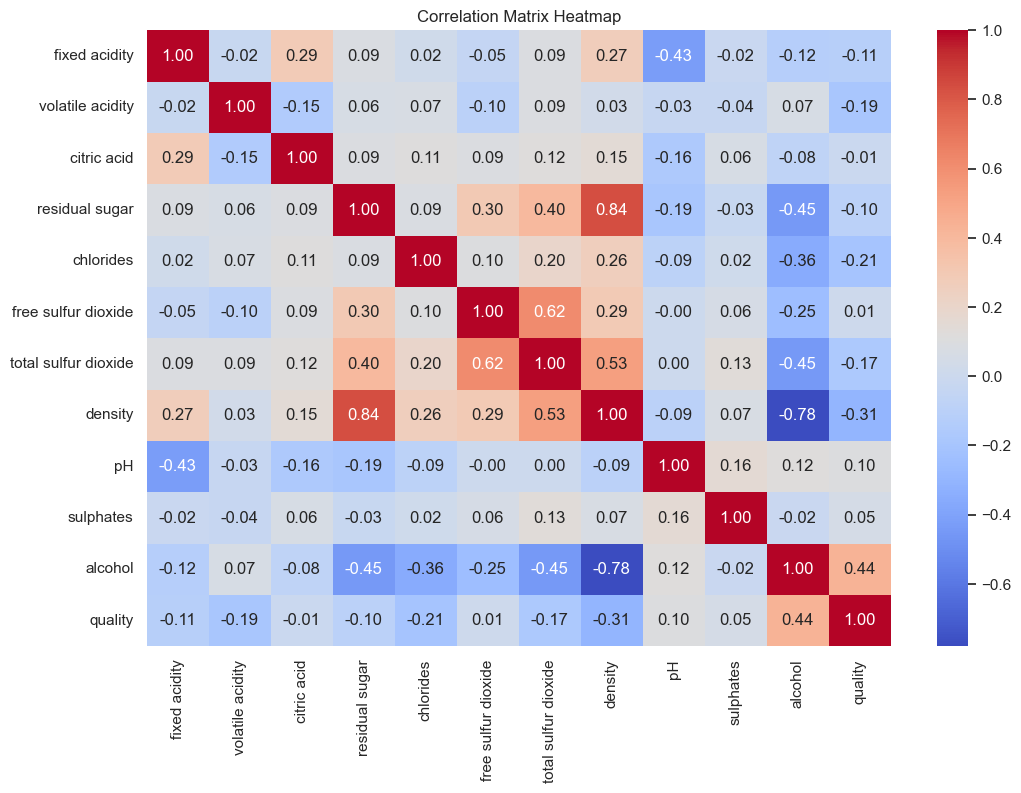

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(White_wine_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

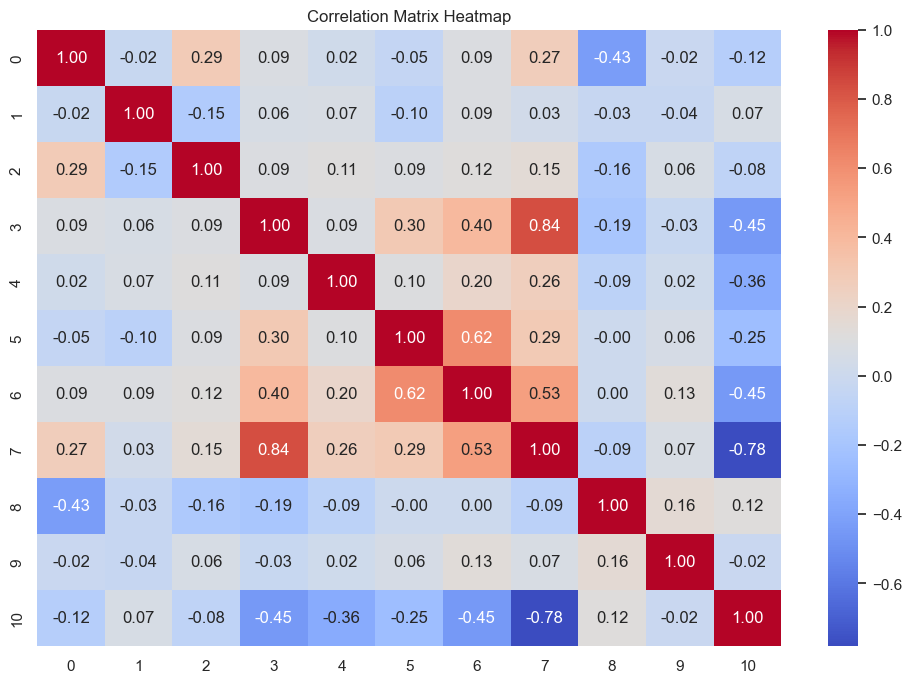

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Clustering

In [25]:
# Step 1: Principal Component Analysis (PCA)
# Reduce to 2 components for visualization purposes
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

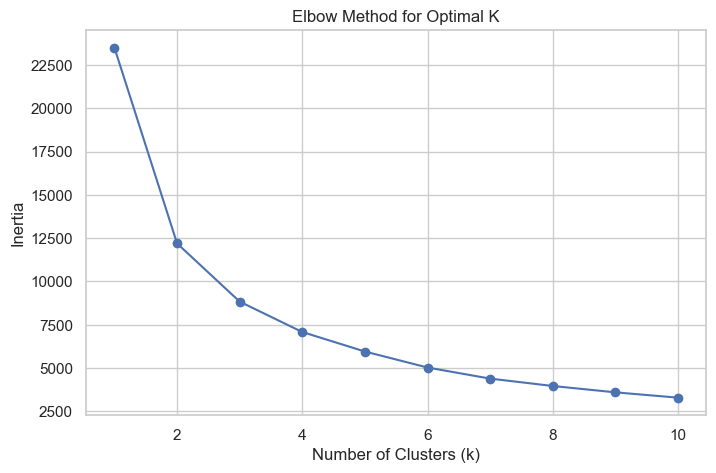

In [26]:
# Using the elbow method to find the optimal number of clusters
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


### Elbow Method Concept:

The elbow method plots the within-cluster sum of squares (often called "inertia") as a function of the number of clusters 
𝑘.

The goal is to identify the "elbow point," where adding more clusters starts to yield diminishing returns (i.e., the rate of decrease in inertia slows down).

**Interpretation of the Elbow:**

In this plot, there is a noticeable decrease in inertia from 𝑘=1 to 𝑘=3, with a gradual tapering off afterward.
The curve starts to flatten after 𝑘=3 or k=4, indicating that adding more clusters beyond this point doesn't significantly reduce inertia.

**Optimal k Value:**

k=3 would provide a simpler model with fewer clusters, while 

k=4 may capture more nuances in the data, though at the cost of added complexity.

In [27]:
# Step 1: Apply KMeans
k=3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


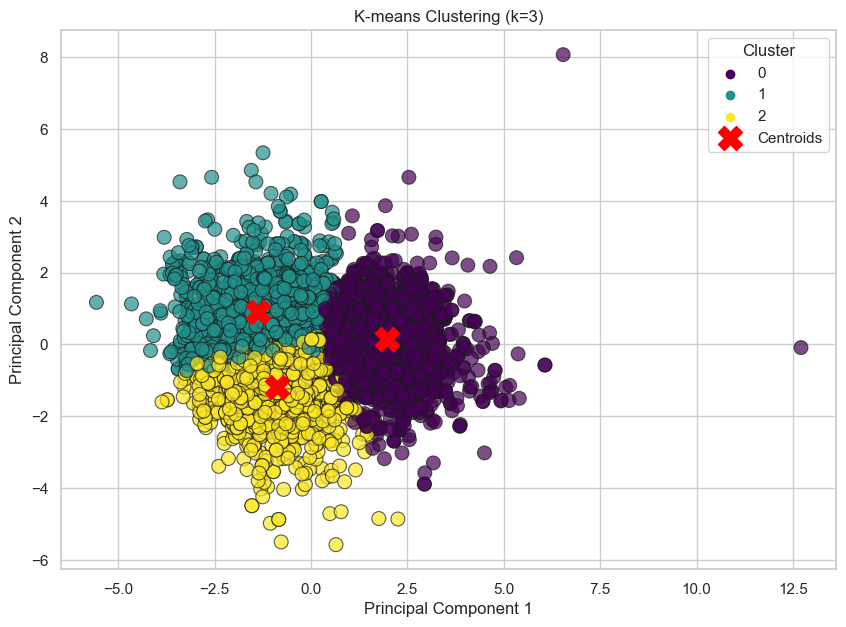

In [28]:
# Step 3: Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=300, c='red', label='Centroids', marker='X')
plt.title(f'K-means Clustering (k={k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


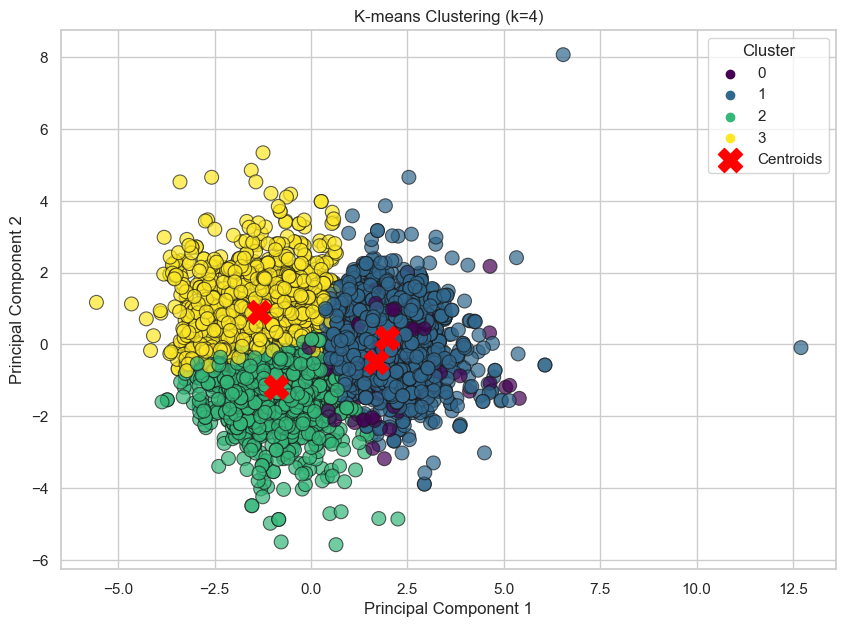

In [29]:
# Step 1: Apply KMeans
k=4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 
            s=300, c='red', label='Centroids', marker='X')
plt.title(f'K-means Clustering (k={k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Clutering analysis
3 clsuters are cleary visible hence optimil k is 3

### Analysis

**Principal Component Analysis (PCA):**

The plot uses two principal components derived from the original features. These components capture the maximum variance possible in two dimensions, allowing us to view the structure of the dataset more easily.
Principal Component 1 and Principal Component 2 don’t directly represent any specific original features but are combinations of them, optimized to spread out the data points as much as possible.

In [31]:
# Explained Variance Ratio for each principal component
print("Explained Variance Ratio by each PCA component:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio by each PCA component:
[0.29293217 0.14320363]


Variance ratio indicates how much of the total variance (or "information") in the dataset is captured by each principal component in PCA. In your case:

Principal Component 1 explains about 29.3% of the variance.

Principal Component 2 explains about 14.3% of the variance.

Together, these two components account for approximately 43.6% of the total variance in the dataset.

# Model Traning

### Random Forest Regressor
Used for regression tasks where the goal is to predict a continuous value.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_ev = explained_variance_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print("Mean Absolute Error (MAE):", rf_mae)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R-squared (R²):", rf_r2)
print("Explained Variance Score:", rf_ev)

Random Forest Regression Results:
Mean Absolute Error (MAE): 0.41881632653061224
Mean Squared Error (MSE): 0.3481008163265306
Root Mean Squared Error (RMSE): 0.590000691801739
R-squared (R²): 0.5505320971653823
Explained Variance Score: 0.5508910567837764


### Random Forest Regression Results

**Mean Absolute Error (MAE): 0.4188**
The Random Forest model’s predictions deviate by an average of 0.42 units from the actual values. This indicates that Random Forest produces relatively accurate predictions compared to other models.

**Mean Squared Error (MSE): 0.3481**
MSE, which measures the average of the squared differences between the predictions and actual values, indicates that the Random Forest model has fewer large errors, making it more reliable.

**Root Mean Squared Error (RMSE): 0.5900**
RMSE is slightly higher than MAE, reflecting some variability in the errors. However, it is still low, confirming that the Random Forest model effectively minimizes prediction error magnitude.

**R-squared (R²): 0.5505**
The R² value indicates that the Random Forest model explains approximately 55.1% of the variance in the target variable. This is relatively strong and highlights the model's capability to capture the underlying structure in the data.

**Explained Variance Score: 0.5509**
This score aligns closely with R², showing that Random Forest accounts for 55.1% of the variability in the data. This further confirms its robustness among the models tested.



In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression Model
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_ev = explained_variance_score(y_test, y_pred_lr)

print("\nLinear Regression Results:")
print("Mean Absolute Error (MAE):", lr_mae)
print("Mean Squared Error (MSE):", lr_mse)
print("Root Mean Squared Error (RMSE):", lr_rmse)
print("R-squared (R²):", lr_r2)
print("Explained Variance Score:", lr_ev)


Linear Regression Results:
Mean Absolute Error (MAE): 0.5862665383250466
Mean Squared Error (MSE): 0.5690247717229252
Root Mean Squared Error (RMSE): 0.7543373063311434
R-squared (R²): 0.26527500421791583
Explained Variance Score: 0.26542822031674806


### Linear Regression Results:

**Mean Absolute Error (MAE): 0.5863**
The Linear Regression model’s predictions deviate by an average of 0.59 units from the actual values. This is higher than the MAE of the Random Forest model, indicating that Linear Regression is less accurate on average.

**Mean Squared Error (MSE): 0.5690**
A higher MSE compared to Random Forest suggests that Linear Regression experiences more significant errors, possibly due to its assumption of a linear relationship, which might not align with the data's complexity.

**Root Mean Squared Error (RMSE): 0.7543**
The RMSE is higher than the Random Forest model's, reflecting larger error magnitudes, especially for data points with substantial deviations from the model's predictions.

**R-squared (R²): 0.2653**
An R² of 0.2653 indicates that Linear Regression explains only 26.5% of the variance in the target variable. This is notably lower than the R² achieved by Random Forest, signaling that Linear Regression may not capture the underlying structure in the data effectively.

**Explained Variance Score: 0.2654**
This score aligns closely with the R² value, suggesting that Linear Regression explains about 26.5% of the variability in the data. While better than SVM in some cases, it still underperforms compared to Random Forest.

In [35]:
# Step 3: Train the SVM Regressor
svm_model = SVR(kernel='rbf')  # You can also experiment with 'linear' or 'poly' kernels
svm_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_svm = svm_model.predict(X_test)

# Step 5: Evaluate the model
svm_mae = mean_absolute_error(y_test, y_pred_svm)
svm_mse = mean_squared_error(y_test, y_pred_svm)
svm_rmse = np.sqrt(svm_mse)
svm_r2 = r2_score(y_test, y_pred_svm)
svm_ev = explained_variance_score(y_test, y_pred_svm)

print("SVM Regression Results:")
print("Mean Absolute Error (MAE):", svm_mae)
print("Mean Squared Error (MSE):", svm_mse)
print("Root Mean Squared Error (RMSE):", svm_rmse)
print("R-squared (R²):", svm_r2)
print("Explained Variance Score:", svm_ev)

SVM Regression Results:
Mean Absolute Error (MAE): 0.5164504781586172
Mean Squared Error (MSE): 0.47082091896323985
Root Mean Squared Error (RMSE): 0.6861639155210946
R-squared (R²): 0.39207585523565947
Explained Variance Score: 0.3951526487730065


### SVM Regression Results:

**Mean Absolute Error (MAE): 0.5165**
The SVM model’s predictions deviate by an average of 0.52 units from the actual values. While better than Linear Regression, it does not achieve the lower MAE of Random Forest, indicating moderate predictive accuracy.

**Mean Squared Error (MSE): 0.4708**
SVM achieves a lower MSE than Linear Regression, reflecting better handling of larger errors. However, its MSE is higher than Random Forest’s, suggesting that SVM still struggles to minimize significant prediction errors as effectively as Random Forest.

**Root Mean Squared Error (RMSE): 0.6862**
The RMSE for SVM is slightly better than Linear Regression’s but higher than Random Forest’s. This result suggests that SVM has moderate performance in minimizing error magnitude, though it performs better with outliers or high deviations compared to the linear model.

**R-squared (R²): 0.3921**
An R² of 0.3921 indicates that SVM explains about 39.2% of the variance in the target variable. This is better than Linear Regression but still substantially lower than Random Forest, showing that SVM captures more of the data’s structure than the linear model but falls short of the non-linear flexibility of Random Forest.

**Explained Variance Score: 0.3952**
The Explained Variance Score aligns closely with the R² value, suggesting that SVM accounts for approximately 39.5% of the variability in the data. This is higher than Linear Regression but significantly lower than Random Forest, further reinforcing the moderate explanatory power of SVM.



In [36]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)

# Calculating evaluation metrics
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_ev = explained_variance_score(y_test, y_pred_xgb)

# Displaying the evaluation results
print("XGBoost Regression Results:")
print("Mean Absolute Error (MAE):", xgb_mae)
print("Mean Squared Error (MSE):", xgb_mse)
print("Root Mean Squared Error (RMSE):", xgb_rmse)
print("R-squared (R²):", xgb_r2)
print("Explained Variance Score:", xgb_ev)

XGBoost Regression Results:
Mean Absolute Error (MAE): 0.4992520380993279
Mean Squared Error (MSE): 0.41502190030899105
Root Mean Squared Error (RMSE): 0.6442219340483457
R-squared (R²): 0.46412356876710126
Explained Variance Score: 0.4642654154026167


### XGBoost Regression Results

**Mean Absolute Error (MAE): 0.4993**
The XGBoost model’s predictions deviate by an average of 0.50 units from the actual values. This shows strong predictive accuracy, better than Linear Regression and SVM, though slightly higher than Random Forest.

**Mean Squared Error (MSE): 0.4150**
The relatively low MSE indicates that XGBoost effectively minimizes larger errors. However, it is higher than Random Forest’s MSE, suggesting that XGBoost does not perform as well as Random Forest in reducing large deviations.

**Root Mean Squared Error (RMSE): 0.6442**
The RMSE, which represents the average magnitude of prediction errors, indicates relatively low prediction errors. It outperforms Linear Regression and SVM but remains higher than Random Forest’s RMSE.

**R-squared (R²): 0.4641**
An R² value of 0.4641 suggests that the XGBoost model explains about 46.4% of the variance in the target variable. This is a substantial improvement over Linear Regression and SVM but still falls short of the explanatory power of Random Forest.

**Explained Variance Score: 0.4643**
The Explained Variance Score aligns closely with the R² value, indicating that XGBoost captures about 46.4% of the variability in the data. This score highlights the model's moderate performance in explaining variability, though it remains less effective than Random Forest.

**What it Means: R²**, or the coefficient of determination, indicates the proportion of variance in the target variable explained by the model. It ranges from 0 to 1, with values closer to 1 indicating that the model explains more of the variance and is therefore a better fit.

**What it Means: MAE** provides the average absolute difference between predicted and actual values, giving a straightforward interpretation of error in the same units as the target variable.

**What it Means: RMSE** measures the square root of the average squared errors, making it more sensitive to larger errors.


MAE and RMSE are useful to understand how close the predictions are to the actual values in terms of average error.

Explained Variance can complement R² and is helpful to assess the model’s explanatory power, especially if R² is low.

# Hyperparameter Tunning

### Define Hyperparameter Grid and Perform Tuning

In [37]:
from sklearn.model_selection import GridSearchCV
# Define the XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],  # L1 regularization
    'reg_lambda': [0, 0.1, 1]  # L2 regularization
}

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 1, 'reg_lambda': 0.1, 'subsample': 0.8}


### Train the Model with Optimal Hyperparameters

In [38]:
# Train the model with the best parameters
best_xgb_model = grid_search.best_estimator_

# Fit the model on the training data
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = best_xgb_model.predict(X_test)


### Evaluate the Model

In [39]:
# Calculating evaluation metrics
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_ev = explained_variance_score(y_test, y_pred_xgb)

# Displaying the evaluation results
print("\nXGBoost Regression Results with Hyperparameter Tuning:")
print("Mean Absolute Error (MAE):", xgb_mae)
print("Mean Squared Error (MSE):", xgb_mse)
print("Root Mean Squared Error (RMSE):", xgb_rmse)
print("R-squared (R²):", xgb_r2)
print("Explained Variance Score:", xgb_ev)



XGBoost Regression Results with Hyperparameter Tuning:
Mean Absolute Error (MAE): 0.42223497507523516
Mean Squared Error (MSE): 0.35326327620353193
Root Mean Squared Error (RMSE): 0.5943595512848531
R-squared (R²): 0.54386632706214
Explained Variance Score: 0.5439113752136474


### Hyparamter Tunned XGboost analysis

**Mean Absolute Error (MAE): 0.4222**
The MAE indicates that, on average, the model's predictions are off by approximately 0.42 units. This is a strong performance, demonstrating better predictive accuracy compared to the untuned model or other models like Linear Regression or SVM.

**Mean Squared Error (MSE): 0.3533**
The MSE, which penalizes larger errors more heavily, is relatively low. This shows that the hyperparameter-tuned XGBoost model effectively minimizes significant deviations in predictions.

**Root Mean Squared Error (RMSE): 0.5944**
RMSE, representing the average magnitude of prediction errors, is also low and consistent with the MSE. This confirms that the model performs well in minimizing both minor and major prediction errors.

**R-squared (R²): 0.5439**
The R² value indicates that the model explains approximately 54.4% of the variance in the target variable. This suggests a substantial improvement over models like Linear Regression and SVM, and it approaches the performance of Random Forest.

**Explained Variance Score: 0.5439**
This score aligns closely with the R² value, showing that the tuned XGBoost model captures about 54.4% of the variability in the data. This further supports its reliability in modeling the underlying relationships.

### Hyperparamter tunning of Random Forest

In [40]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 500],          # Number of trees in the forest
    'max_depth': [10, 20, 30, None],              # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],              # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],     # Number of features to consider for the best split
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                       # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use MSE for scoring
    n_jobs=-1,                  # Use all available cores
    verbose=2
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)

# Train the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_rf_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
rf_mse_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
rf_rmse_tuned = np.sqrt(rf_mse_tuned)
rf_mae_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rf_r2_tuned = r2_score(y_test, y_pred_rf_tuned)
rf_ev_tuned = explained_variance_score(y_test, y_pred_rf_tuned)

print("\nTuned Random Forest Regression Results:")
print("Mean Absolute Error (MAE):", rf_mae_tuned)
print("Mean Squared Error (MSE):", rf_mse_tuned)
print("Root Mean Squared Error (RMSE):", rf_rmse_tuned)
print("R-squared (R²):", rf_r2_tuned)
print("Explained Variance Score:", rf_ev_tuned)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
482 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Saurabh\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Saurabh\anaconda3\Lib\

Best parameters found by GridSearchCV: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

Tuned Random Forest Regression Results:
Mean Absolute Error (MAE): 0.41673659997761814
Mean Squared Error (MSE): 0.33554960019619234
Root Mean Squared Error (RMSE): 0.5792664328236121
R-squared (R²): 0.5667382320766988
Explained Variance Score: 0.5670135374821204


# Model Interpretations

### Random Forest Regression

**Strong Performance:**
The base Random Forest model achieves excellent results, with a low MAE (0.4188), MSE (0.3481), and RMSE (0.5900).
It explains 55% of the variance in the target variable (R²: 0.5505, Explained Variance: 0.5509), outperforming Linear Regression, SVM, and untuned XGBoost.

**Conclusion:** A solid performer, Random Forest demonstrates robust generalization and accuracy.

### Tuned Random Forest Regression

**Best Overall Model:**

After hyperparameter tuning, Random Forest delivers the lowest errors across all metrics:
MAE: 0.4167 (improved from 0.4188).

MSE: 0.3355 (reduced from 0.3481).

RMSE: 0.5793 (reduced from 0.5900).

**Higher Variance Explained:** With an R² of 0.5667 and an Explained Variance score of 0.5670, it outperforms all other models, including tuned XGBoost.

**Conclusion:** Tuned Random Forest is the best-performing model for this dataset.

### Linear Regression

**Weak Performance:**

Linear Regression underperforms, with the highest error rates (MAE: 0.5863, MSE: 0.5690, RMSE: 0.7543).
It explains only 26.5% of the variance in the target variable, indicating its inability to capture complex patterns in the data.

**Conclusion:** Linear Regression is unsuitable for this dataset.

### SVM Regression

**Moderate Performance:**

SVM improves over Linear Regression, with lower error metrics (MAE: 0.5165, MSE: 0.4708, RMSE: 0.6862).
R² (0.3921) and Explained Variance (0.3952) indicate that it captures more variance than Linear Regression but less than Random Forest or XGBoost.

**Conclusion:** SVM offers reasonable performance but is outperformed by ensemble methods like Random Forest and XGBoost.

### XGBoost Regression

**Competitive Performance:**
XGBoost performs well, with an MAE of 0.4993 and RMSE of 0.6442.
Its R² (0.4641) and Explained Variance (0.4643) are better than Linear Regression and SVM but lower than Random Forest.

**Conclusion:** XGBoost provides strong results and is a good alternative with room for improvement via hyperparameter tuning.

### XGBoost (Hyperparameter Tuning)

**Notable Improvement:**

After tuning, XGBoost achieves an MAE of 0.4222 and an RMSE of 0.5944, with an R² of 0.5439.
While these improvements make XGBoost competitive with Random Forest, it still slightly underperforms compared to the tuned Random Forest model.

**Conclusion:** Tuned XGBoost is a close contender and suitable for use where efficiency or additional flexibility is needed.
Key Takeaways